In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential , load_model
from tensorflow.keras.layers import Dense , Dropout , Activation

In [64]:
(x_train , y_train),(x_test , y_test) = mnist.load_data()

In [65]:
x_train[20]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [66]:
x_train[0].shape

(28, 28)

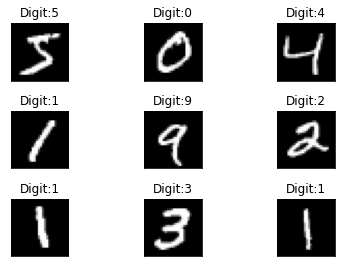

In [67]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i],cmap="gray")
    plt.title("Digit:{}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [68]:
#building input vector from 28 * 28 pixels

In [69]:
x_train = x_train.reshape(60000 , 784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

In [70]:
x_train /= 255
x_test /= 255

In [71]:
x_train[20]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [72]:
#one hot encoding عندي فيكتور كله اصفار م عدا قيمه واحده بس بواحد(عايزين نظبط ال y)

In [73]:
#softmax => بتطلع احتمال معين 

In [74]:
#one hot encoding using keras

In [75]:
n_classes = 10 
print("before : {}".format(y_train.shape))
y_train = tf.keras.utils.to_categorical(y_train , n_classes)
y_test = tf.keras.utils.to_categorical(y_test , n_classes)
print("before : {}".format(y_test.shape))

before : (60000,)
before : (10000, 10)


In [76]:
#building nural network Dense => Fully connected layer , 

In [84]:
model = Sequential()
model.add(Dense(512 , input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation("softmax"))

In [85]:
#Complile the model 

In [88]:
model.compile(loss="categorical_crossentropy" , metrics = ["accuracy"] ,optimizer = 'adam')

In [89]:
history = model.fit(x_train , y_train , epochs = 20 , batch_size = 128 , validation_data =(x_test , y_test))

Epoch 1/20
469/469 [==============================] - 5s 9ms/step - loss: 0.2490 - accuracy: 0.9249 - val_loss: 0.1151 - val_accuracy: 0.9634
Epoch 2/20
469/469 [==============================] - 4s 9ms/step - loss: 0.1008 - accuracy: 0.9686 - val_loss: 0.0780 - val_accuracy: 0.9751
Epoch 3/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0700 - accuracy: 0.9779 - val_loss: 0.0687 - val_accuracy: 0.9799
Epoch 4/20
469/469 [==============================] - 4s 9ms/step - loss: 0.0547 - accuracy: 0.9822 - val_loss: 0.0615 - val_accuracy: 0.9796
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0461 - accuracy: 0.9850 - val_loss: 0.0642 - val_accuracy: 0.9815
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0401 - accuracy: 0.9866 - val_loss: 0.0593 - val_accuracy: 0.9818
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0347 - accuracy: 0.9887 - val_loss: 0.0615 - val_accuracy: 0.9821
Epoch 

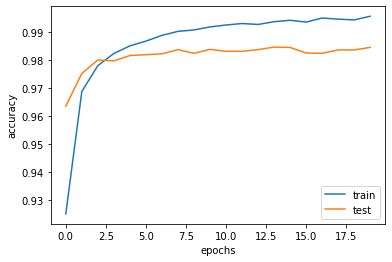

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train" , "test"] , loc = "lower right")

In [105]:
loss_and_accuracy = model.evaluate(x_test , y_test)
print("test loos : {}".format(loss_and_accuracy[0]))
print("test accuracy : {}".format(loss_and_accuracy[0]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0778 - accuracy: 0.9844
test loos : 0.07775925099849701
test accuracy : 0.07775925099849701


In [106]:
predicted_classes=model.predict(x_test)

In [107]:
predicted_classes

array([[4.8913070e-15, 3.0928585e-10, 1.4688889e-11, ..., 1.0000000e+00,
        1.7907430e-14, 4.8500489e-08],
       [1.2103305e-18, 1.0331771e-07, 9.9999988e-01, ..., 4.8090966e-18,
        6.4481925e-15, 3.6926195e-21],
       [7.0177436e-12, 9.9999964e-01, 1.4426429e-09, ..., 3.5622500e-07,
        5.3987916e-09, 2.1075738e-13],
       ...,
       [3.0012672e-20, 1.2447866e-14, 3.6510878e-22, ..., 6.7104118e-14,
        4.2827449e-14, 2.1812867e-11],
       [2.1189170e-13, 1.7972064e-18, 7.4640296e-19, ..., 3.8328359e-15,
        4.3514090e-10, 4.8891308e-20],
       [2.2838071e-15, 4.1710338e-18, 1.0501464e-18, ..., 4.0876207e-22,
        9.0803770e-15, 6.2258762e-19]], dtype=float32)

In [122]:
import numpy as np
print(y_test[1])
maxx = np.argmax(predicted_classes[1])
maxx

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


2

In [126]:
import numpy as np
predicted_classes = np.argmax(predicted_classes , axis = -1)
predicted_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

1
AxesImage(54,36;334.8x217.44)


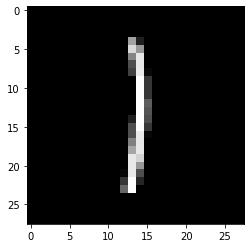

In [128]:
print(predicted_classes[40])
print(plt.imshow(x_test[40].reshape(28 , 28) , cmap ="gray"))

6
AxesImage(54,36;334.8x217.44)


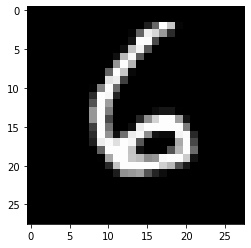

In [129]:
print(predicted_classes[600])
print(plt.imshow(x_test[600].reshape(28 , 28) , cmap ="gray"))